# Importando o DF 

In [82]:
import pandas as pd
df=pd.read_csv('base_com_modelo_sem_ocupacao.csv')
df

,Idade,Renda_Mensal,Gasto_Internet,Regiao,Genero,Plano_Atual,Motivo_Troca
0,60.00,5681.000,368.000,Sudeste,Feminino,Basico,Preco Alto
1,21.00,6172.000,214.275,Sudeste,Masculino,Basico,Cobertura Ruim
2,21.00,7569.545,267.620,Norte,Feminino,Intermediario,Atendimento Ruim
3,34.00,3782.000,394.000,Sudeste,Masculino,Basico,Atendimento Ruim
4,49.56,8875.020,339.000,Nordeste,Masculino,Basico,Cobertura Ruim
...,...,...,...,...,...,...,...
2459,25.00,15336.000,381.000,Sul,Feminino,Basico,Cobertura Ruim
2460,21.00,5426.000,168.000,Centro-Oeste,Masculino,Intermediario,Cobertura Ruim
2461,22.00,3886.000,190.000,Sudeste,Feminino,Premium,Cobertura Ruim
2462,39.00,3714.000,362.000,Norte,Feminino,Intermediario,Atendimento Ruim


# Tranformando em Dummies

Transformando os valores qualitativos em quantitativos para poder aplicar KMeans

In [83]:
df_dummies = pd.get_dummies(df)
df_dummies

,Idade,Renda_Mensal,Gasto_Internet,Regiao_Centro-Oeste,Regiao_Nordeste,Regiao_Norte,Regiao_Sudeste,Regiao_Sul,Genero_Feminino,Genero_Masculino,Genero_Outro,Plano_Atual_Basico,Plano_Atual_Intermediario,Plano_Atual_Premium,Motivo_Troca_Atendimento Ruim,Motivo_Troca_Cobertura Ruim,Motivo_Troca_Preco Alto
0,60.00,5681.000,368.000,0,0,0,1,0,1,0,0,1,0,0,0,0,1
1,21.00,6172.000,214.275,0,0,0,1,0,0,1,0,1,0,0,0,1,0
2,21.00,7569.545,267.620,0,0,1,0,0,1,0,0,0,1,0,1,0,0
3,34.00,3782.000,394.000,0,0,0,1,0,0,1,0,1,0,0,1,0,0
4,49.56,8875.020,339.000,0,1,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459,25.00,15336.000,381.000,0,0,0,0,1,1,0,0,1,0,0,0,1,0
2460,21.00,5426.000,168.000,1,0,0,0,0,0,1,0,0,1,0,0,1,0
2461,22.00,3886.000,190.000,0,0,0,1,0,1,0,0,0,0,1,0,1,0
2462,39.00,3714.000,362.000,0,0,1,0,0,1,0,0,0,1,0,1,0,0


Normalizando a planilha, para valores em que a soma das linhas seja igual a 1.

In [84]:
df_normalizada = df_dummies.div(df_dummies.sum(axis=1), axis='rows')
df_normalizada

,Idade,Renda_Mensal,Gasto_Internet,Regiao_Centro-Oeste,Regiao_Nordeste,Regiao_Norte,Regiao_Sudeste,Regiao_Sul,Genero_Feminino,Genero_Masculino,Genero_Outro,Plano_Atual_Basico,Plano_Atual_Intermediario,Plano_Atual_Premium,Motivo_Troca_Atendimento Ruim,Motivo_Troca_Cobertura Ruim,Motivo_Troca_Preco Alto
0,0.009815,0.929331,0.060200,0.000000,0.000000,0.000000,0.000164,0.000000,0.000164,0.000000,0.0,0.000164,0.000000,0.000000,0.000000,0.000000,0.000164
1,0.003275,0.962679,0.033422,0.000000,0.000000,0.000000,0.000156,0.000000,0.000000,0.000156,0.0,0.000156,0.000000,0.000000,0.000000,0.000156,0.000000
2,0.002671,0.962781,0.034039,0.000000,0.000000,0.000127,0.000000,0.000000,0.000127,0.000000,0.0,0.000000,0.000127,0.000000,0.000127,0.000000,0.000000
3,0.008068,0.897485,0.093498,0.000000,0.000000,0.000000,0.000237,0.000000,0.000000,0.000237,0.0,0.000237,0.000000,0.000000,0.000237,0.000000,0.000000
4,0.005348,0.957642,0.036579,0.000000,0.000108,0.000000,0.000000,0.000000,0.000000,0.000108,0.0,0.000108,0.000000,0.000000,0.000000,0.000108,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459,0.001588,0.973962,0.024197,0.000000,0.000000,0.000000,0.000000,0.000064,0.000064,0.000000,0.0,0.000064,0.000000,0.000000,0.000000,0.000064,0.000000
2460,0.003737,0.965652,0.029899,0.000178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000178,0.0,0.000000,0.000178,0.000000,0.000000,0.000178,0.000000
2461,0.005363,0.947343,0.046319,0.000000,0.000000,0.000000,0.000244,0.000000,0.000244,0.000000,0.0,0.000000,0.000000,0.000244,0.000000,0.000244,0.000000
2462,0.009468,0.901675,0.087885,0.000000,0.000000,0.000243,0.000000,0.000000,0.000243,0.000000,0.0,0.000000,0.000243,0.000000,0.000243,0.000000,0.000000


Implementando o modelo do cotovelo para definir o número de clusters

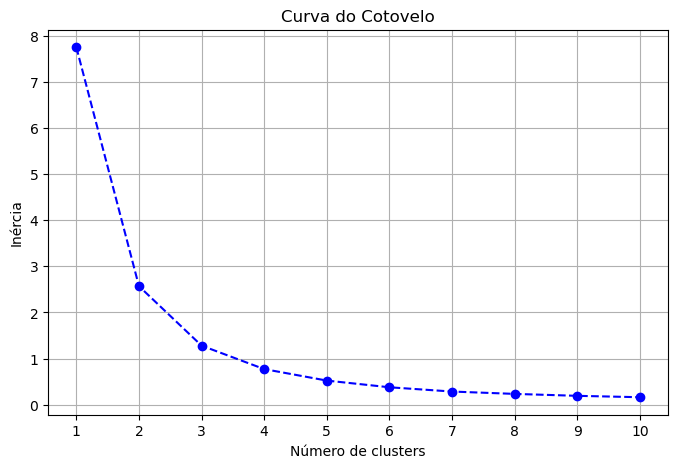

In [85]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Verificando se df_normalizada existe
try:
    X = df_normalizada.values  # Convertendo para numpy array
except NameError:
    raise ValueError("O DataFrame 'df_normalizada' não foi encontrado. Certifique-se de que ele existe.")

# Determinando a inércia para diferentes números de clusters
inertias = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plotando a curva de cotovelo
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertias, marker='o', linestyle='--', color='b')
plt.title('Curva do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.xticks(cluster_range)
plt.grid()
plt.show()


### Utilizando o método Kneelocator para identificar o melhor cluster 

Melhor número de clusters (cotovelo): 3


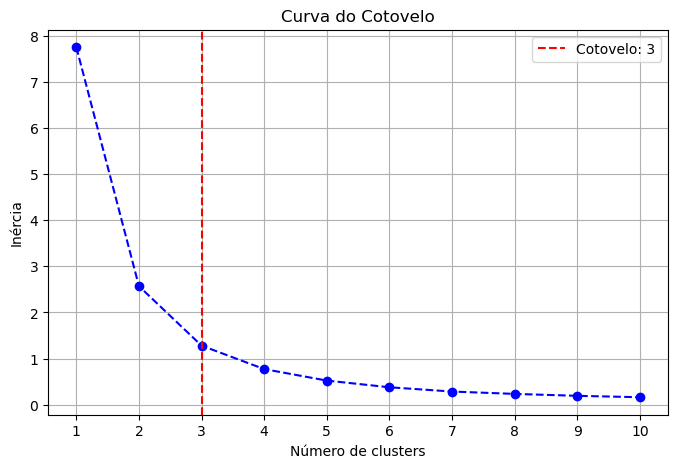

In [86]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

try:
    X = df_normalizada.values  # Convertendo para numpy array
except NameError:
    raise ValueError("O DataFrame 'df_normalizada' não foi encontrado. Certifique-se de que ele existe.")

# Determinando a inércia para diferentes números de clusters
inertias = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Usando KneeLocator para identificar o cotovelo
knee_locator = KneeLocator(cluster_range, inertias, curve="convex", direction="decreasing")
optimal_k = knee_locator.knee
print(f"Melhor número de clusters (cotovelo): {optimal_k}")

# Plotando a curva do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertias, marker='o', linestyle='--', color='b')
plt.axvline(optimal_k, color='r', linestyle='--', label=f"Cotovelo: {optimal_k}")
plt.title('Curva do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.xticks(cluster_range)
plt.legend()
plt.grid()
plt.show()

A partir do modelo do cotovelo e da aplicação do KneeLocator, entende-se que o número ideal de cluster é de 3. No entanto, tanto 3 quanto o 2 é cabível para fazer a análise, então resta aplicar o método da silueta para confirmar qual é o melhor cluster para o DataFrame.

Melhor número de clusters com base no método da silhueta: 2


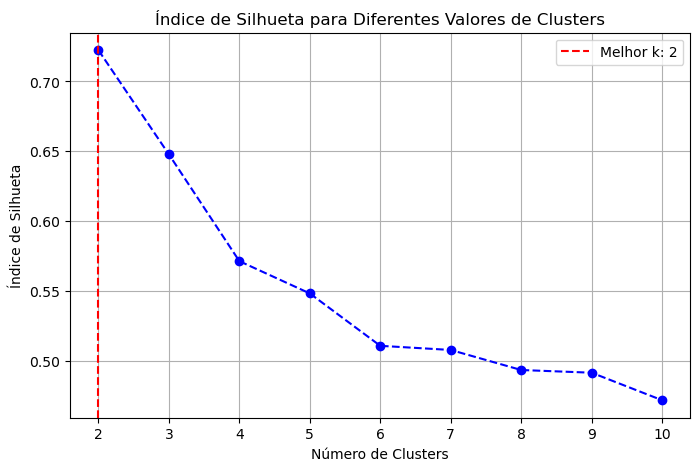

In [87]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Verificando se df_normalizada existe
try:
    X = df_normalizada.values  # Convertendo para numpy array
except NameError:
    raise ValueError("O DataFrame 'df_normalizada' não foi encontrado. Certifique-se de que ele existe.")

# Avaliando o índice de silhueta para diferentes números de clusters
silhouette_scores = []
cluster_range = range(2, 11)  # Começamos em 2 porque com 1 cluster não há variação

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Determinando o número ideal de clusters
optimal_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]

# Exibindo resultados
print(f"Melhor número de clusters com base no método da silhueta: {optimal_k}")

# Plotando o índice de silhueta para cada valor de k
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='b')
plt.axvline(optimal_k, color='r', linestyle='--', label=f"Melhor k: {optimal_k}")
plt.title('Índice de Silhueta para Diferentes Valores de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Silhueta')
plt.xticks(cluster_range)
plt.legend()
plt.grid()
plt.show()


Assim, foi utilizada o número de cluster 2 para nosso modelo, uma vez que resultou em um alto valor do indíce de silhueta. 

## Clusterizando

O algoritmo K-Means é eficaz para clustering com dados quantitativos, mas pode ser utilizado também com dados qualitativos, desde que estes sejam convertidos para formato numérico. No caso das categorias escolhidas, como muitas delas são fáceis de transformar de qualititativo para quantitativo, como a categoria "Genero" possuindo apenas "Masculino", "Femino" e "Outros", foi utilizado o KMeans para realizar a clusterização. 

Aplicando o KMeans e adicionando a coluna "cluster" no Data Frame

In [88]:
# Aplicando K-Means
from sklearn.cluster import KMeans

clusterizacao_por_km = KMeans(n_clusters=2, random_state=42)
labels = clusterizacao_por_km.fit_predict(df_normalizada.values)  # Rótulos dos clusters

# Adicionando os rótulos ao DataFrame original
#df = df_normalizada.copy()
df['cluster'] = labels

df


,Idade,Renda_Mensal,Gasto_Internet,Regiao,Genero,Plano_Atual,Motivo_Troca,cluster
0,60.00,5681.000,368.000,Sudeste,Feminino,Basico,Preco Alto,1
1,21.00,6172.000,214.275,Sudeste,Masculino,Basico,Cobertura Ruim,1
2,21.00,7569.545,267.620,Norte,Feminino,Intermediario,Atendimento Ruim,1
3,34.00,3782.000,394.000,Sudeste,Masculino,Basico,Atendimento Ruim,0
4,49.56,8875.020,339.000,Nordeste,Masculino,Basico,Cobertura Ruim,1
...,...,...,...,...,...,...,...,...
2459,25.00,15336.000,381.000,Sul,Feminino,Basico,Cobertura Ruim,1
2460,21.00,5426.000,168.000,Centro-Oeste,Masculino,Intermediario,Cobertura Ruim,1
2461,22.00,3886.000,190.000,Sudeste,Feminino,Premium,Cobertura Ruim,1
2462,39.00,3714.000,362.000,Norte,Feminino,Intermediario,Atendimento Ruim,0


### Plotando o gráfico de visualização Scatter para compreender melhor os grupos quando o número de cluster é 3
 

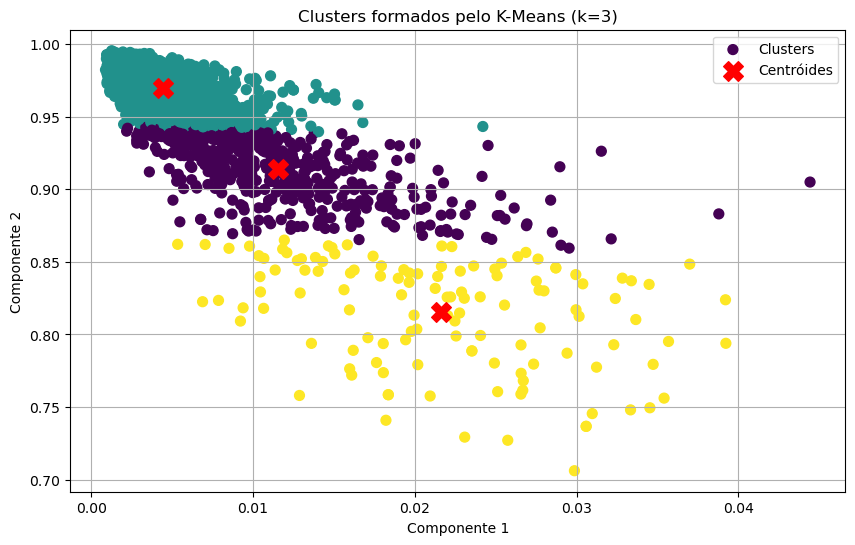

In [89]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Verificando se df_normalizada existe
try:
    X = df_normalizada.values  # Convertendo para numpy array
except NameError:
    raise ValueError("O DataFrame 'df_normalizada' não foi encontrado. Certifique-se de que ele existe.")

# Definir o número de clusters desejado
n_clusters = 3  # Modifique para o número de clusters que desejar

# Aplicando o algoritmo de K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

# Adicionando os clusters ao DataFrame original
df_clusterizado = df_normalizada.copy()
df_clusterizado['Cluster'] = labels

# Visualização gráfica dos clusters
if X.shape[1] >= 2:  # Verifica se os dados têm pelo menos 2 dimensões para plotar
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, label="Clusters")
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label="Centróides")
    plt.title(f'Clusters formados pelo K-Means (k={n_clusters})')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("\nOs dados não possuem pelo menos 2 dimensões para gerar o gráfico.")



### Plotando o gráfico de visualização Scatter para compreender melhor os grupos quando o número de cluster é 2

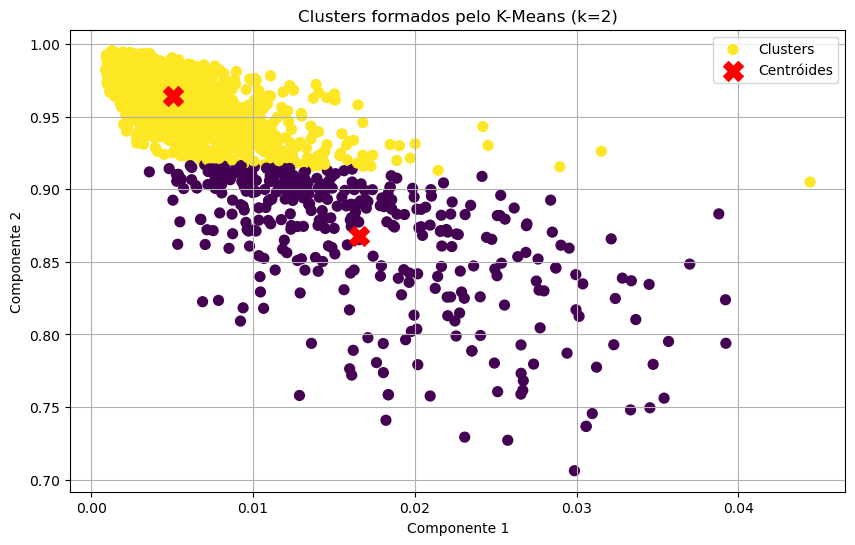

In [90]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Verificando se df_normalizada existe
try:
    X = df_normalizada.values  # Convertendo para numpy array
except NameError:
    raise ValueError("O DataFrame 'df_normalizada' não foi encontrado. Certifique-se de que ele existe.")

# Definir o número de clusters como 2
n_clusters = 2

# Aplicando o algoritmo de K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

# Visualização gráfica dos clusters
if X.shape[1] >= 2:  # Verifica se os dados têm pelo menos 2 dimensões
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, label="Clusters")
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label="Centróides")
    plt.title('Clusters formados pelo K-Means (k=2)')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("\nOs dados não possuem pelo menos 2 dimensões para gerar o gráfico.")


# Clusterizando

Filtrando colunas quantitativas e qualitativas em um DataFrame, calcula-se as médias para as variáveis quantitativas e as proporções para as variáveis qualitadtivas em cada cluster, e é gerado um resumo para cada cluster. Assim, cria-se um resumo das características dos clusters. 

In [91]:
import pandas as pd

# Filtrando os nomes das colunas quantitativas e qualitativas
colunas_qualitativas = [col for col in df.columns if df[col].nunique() <= 10 and col != 'cluster']
colunas_quantitativas = [col for col in df.columns if col not in colunas_qualitativas + ['cluster']]

# Calculando as características dos clusters
resumo_clusters = []

for cluster in df['cluster'].unique():
    cluster_dados = df[df['cluster'] == cluster]
    resumo = {'Cluster': cluster}
    
    # Calculando médias para as variáveis quantitativas
    for col in colunas_quantitativas:
        resumo[f'{col}_Media'] = cluster_dados[col].mean()
    
    # Calculando proporções para as variáveis qualitativas
    for col in colunas_qualitativas:
        resumo[f'{col}_Proporcao'] = cluster_dados[col].value_counts(normalize=True).to_dict()
    
    resumo_clusters.append(resumo)

# Criando um DataFrame resumo
df_resumo = pd.DataFrame(resumo_clusters)

# Exibindo as principais características
pd.set_option('display.max_columns', None)
df_resumo



,Cluster,Idade_Media,Renda_Mensal_Media,Gasto_Internet_Media,Regiao_Proporcao,Genero_Proporcao,Plano_Atual_Proporcao,Motivo_Troca_Proporcao
0,1,42.695527,10136.598305,265.304142,"{'Sudeste': 0.3760724499523356, 'Nordeste': 0....","{'Masculino': 0.5023832221163013, 'Feminino': ...","{'Basico': 0.451858913250715, 'Intermediario':...","{'Cobertura Ruim': 0.43898951382268825, 'Preco..."
1,0,46.172964,2785.217254,333.652445,"{'Sudeste': 0.4371584699453552, 'Norte': 0.234...","{'Feminino': 0.5437158469945356, 'Masculino': ...","{'Basico': 0.43169398907103823, 'Intermediario...","{'Cobertura Ruim': 0.47540983606557374, 'Atend..."


In [92]:
for i, row in df_resumo.iterrows():
    print(f"Cluster {row['Cluster']}: Motivo_Troca_Proporcao: {row['Motivo_Troca_Proporcao']}")

Cluster 1: Motivo_Troca_Proporcao: {'Cobertura Ruim': 0.43898951382268825, 'Preco Alto': 0.2840800762631077, 'Atendimento Ruim': 0.276930409914204}
Cluster 0: Motivo_Troca_Proporcao: {'Cobertura Ruim': 0.47540983606557374, 'Atendimento Ruim': 0.28415300546448086, 'Preco Alto': 0.24043715846994534}
